### 🔍 Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 📥 Step 2: Load Dataset

In [3]:
file_path = '../data/raw/data.csv'
data = pd.read_csv(file_path)

print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")
data.head()


Rows: 95662, Columns: 16


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


### 🔎 Step 3: Data Overview

In [3]:
data.info()

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Duplicated Rows: {duplicates}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

### 📊 Step 4: Summary Statistics

In [4]:
# Numeric
data.describe()

# Categorical
data.describe(include='object')


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


In [5]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


### 🏷️ Step 5: Categorical Features Overview

In [ ]:
# Define columns to exclude (ID-like)
exclude_cols = [
    'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 
    'CustomerId', 'TransactionStartTime', 'CurrencyCode'
]

# Select categorical columns excluding IDs
cat_cols = [col for col in data.select_dtypes(include='object').columns if col not in exclude_cols]

# Print value counts for meaningful categorical features
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())



Column: ProviderId
ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64

Column: ProductId
ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
ProductId_13      296
ProductId_2       236
ProductId_20      216
ProductId_8       197
ProductId_24      175
ProductId_22      112
ProductId_7        86
ProductId_27       31
ProductId_5        25
ProductId_9        17
ProductId_16       10
ProductId_12        2
ProductId_23        1
Name: count, dtype: int64

Column: ProductCategory
ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport    

### 📈 Step 6: Distribution of Numerical Features

In [16]:
# drop country code column
data.drop(columns=['CountryCode'], inplace=True)

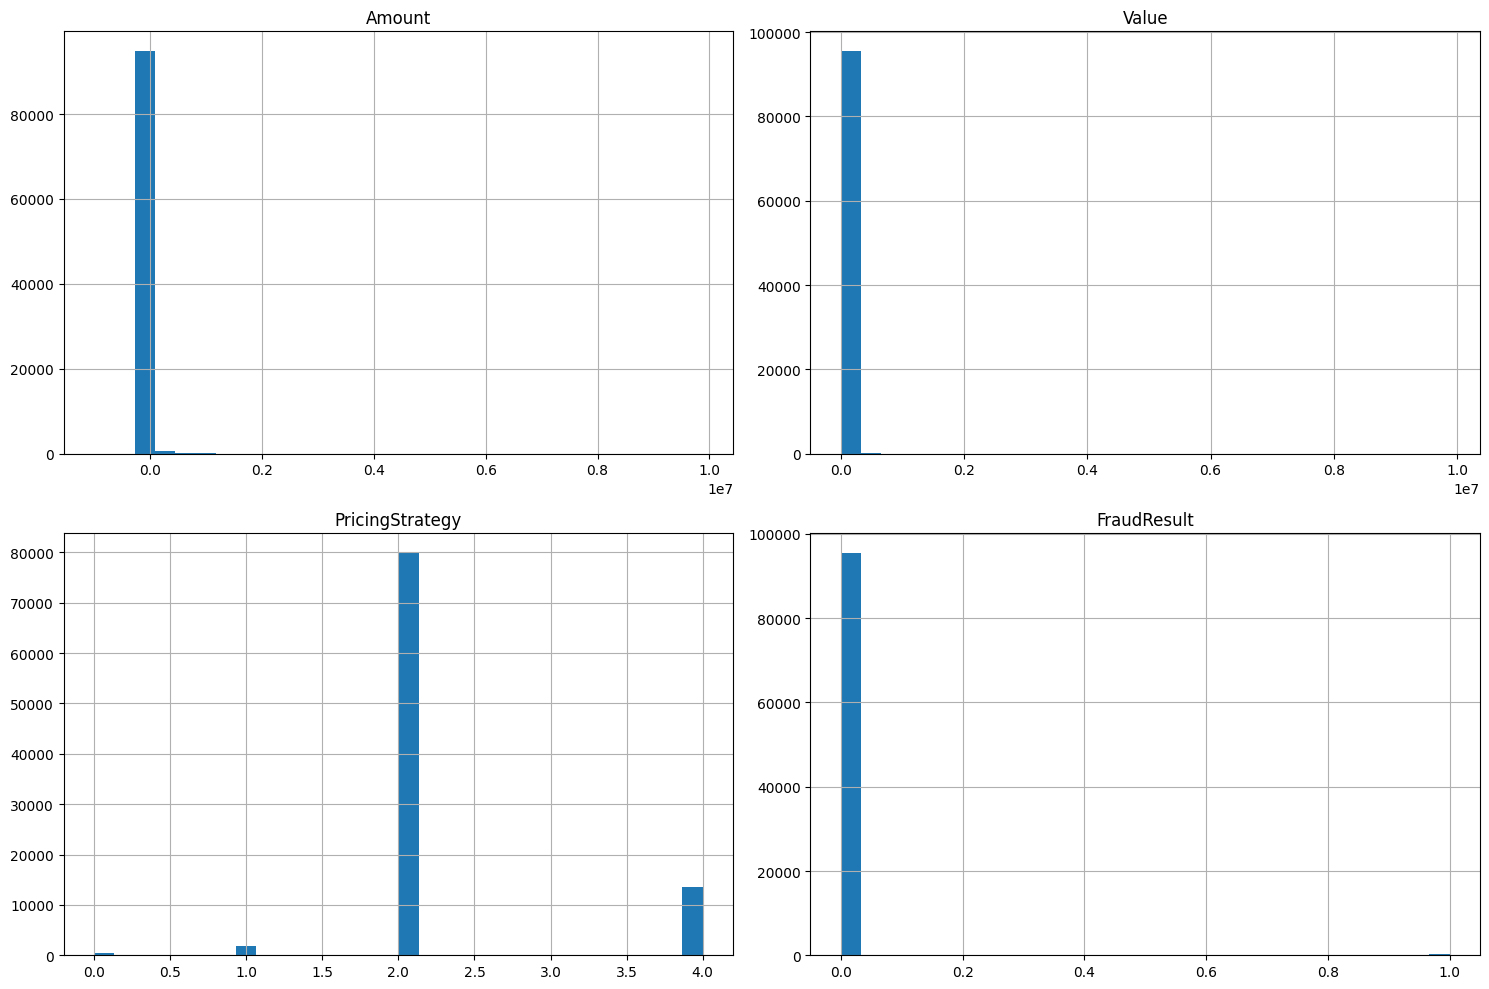

In [17]:
num_cols = data.select_dtypes(include=np.number).columns

data[num_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.savefig('../numeric_histograms.png')
plt.show()


### 📊 Step 7: Distribution of Categorical Features

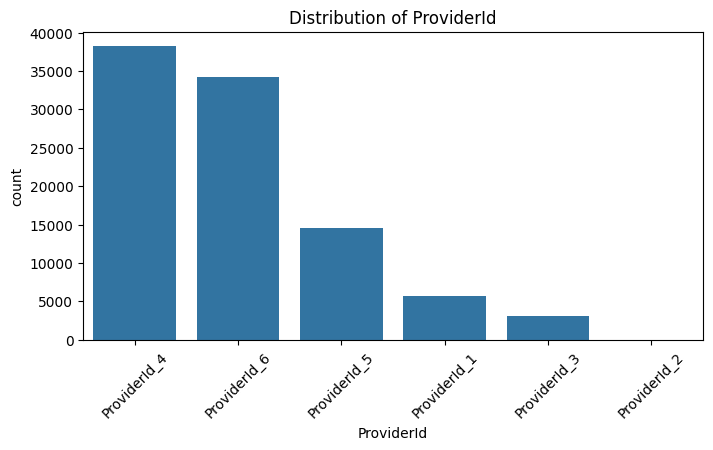

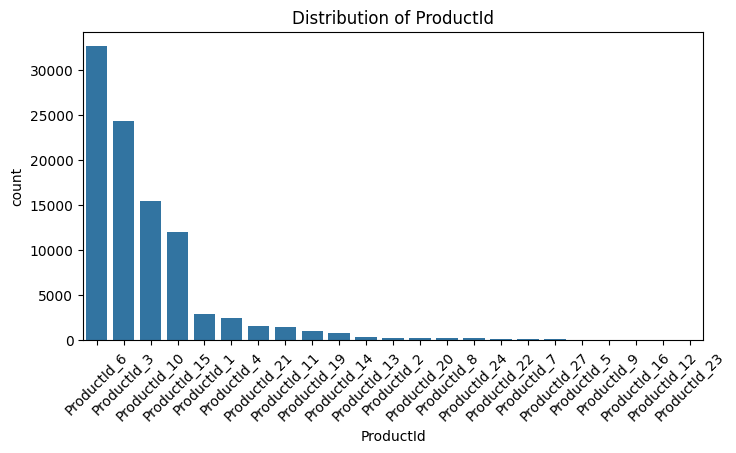

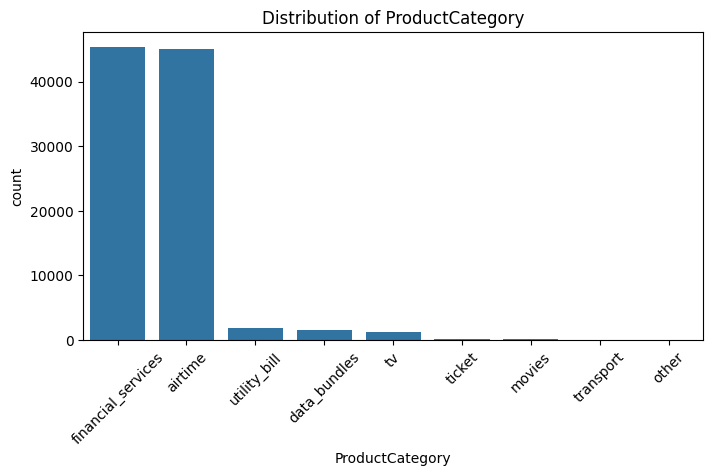

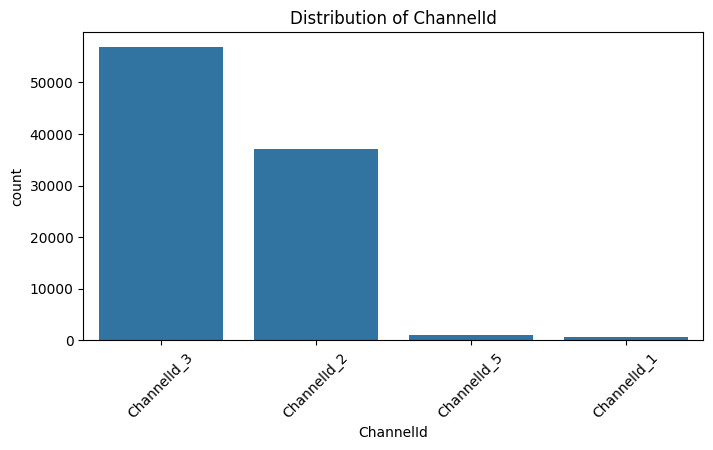

In [5]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


### 🔗 Step 8: Correlation Heatmap

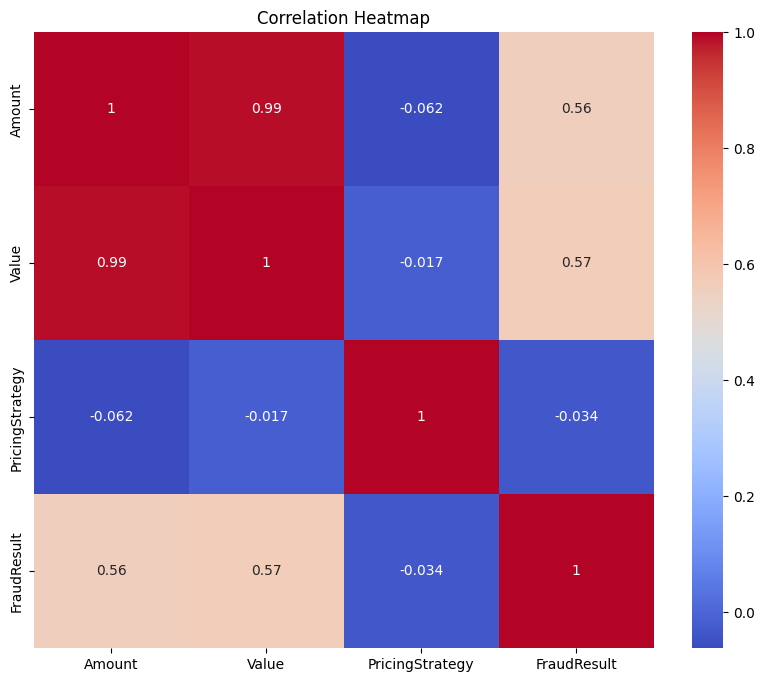

In [18]:
plt.figure(figsize=(10,8))
corr = data[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### ⚠️ Step 9: Missing Values Check

In [4]:
missing = data.isnull().sum()
missing = missing[missing > 0]

if missing.empty:
    print("No missing values.")
else:
    missing.sort_values(ascending=False).plot.bar(figsize=(8,5))
    plt.title('Missing Values per Column')
    plt.show()


No missing values.


In [ ]:
# Percentage of fraudulent transactions
fraud_count = data['FraudResult'].value_counts()
print(f"Total transactions: {data.shape[0]}")
print(f"Fraudulent transactions: {fraud_count[1]} ({fraud_count[1] / data.shape[0] * 100:.2f}%)")

# fraud_percentage = (data['FraudResult'].value_counts(normalize=True) * 100).round(2)
# print(f"Fraudulent transactions: {fraud_percentage[1]}%")

Total transactions: 95662
Fraudulent transactions: 193 (0.20%)


### 🚩 Step 10: Outlier Detection (Boxplots)

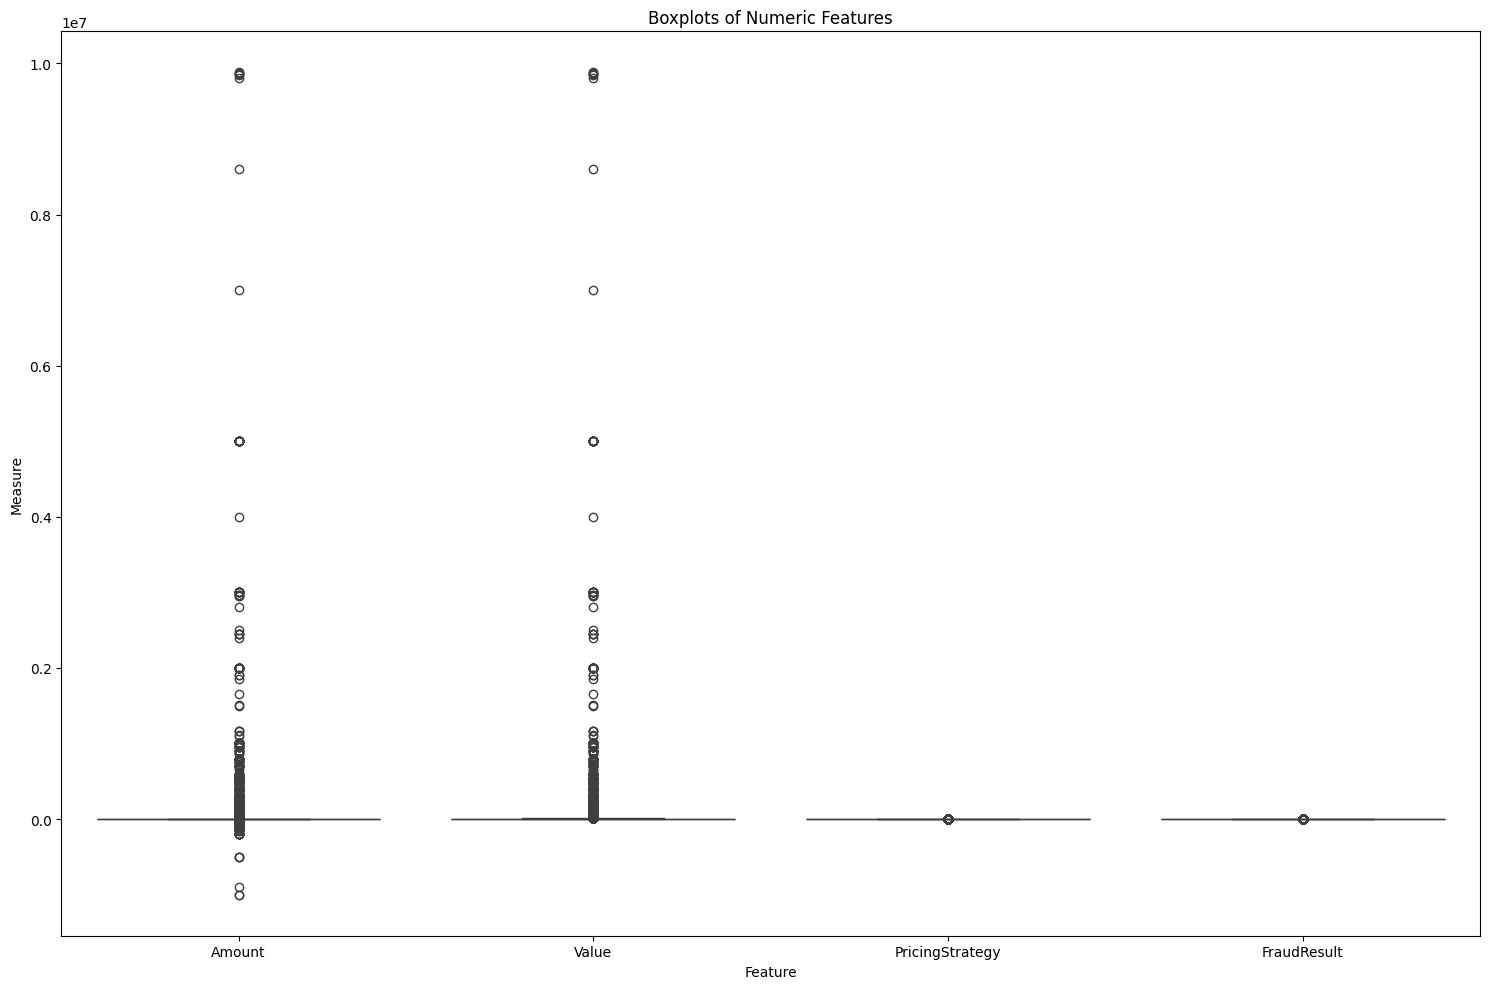

In [ ]:
# for col in num_cols:
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(x=data[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

boxplot_data = data[num_cols].melt(var_name='Feature', value_name='Measure')

plt.figure(figsize=(15, 10))
sns.boxplot(x='Feature', y='Measure', data=boxplot_data)
plt.title('Boxplots of Numeric Features')
plt.tight_layout()
plt.savefig('../numeric_boxplots.png')
plt.show()


 Check Distribution of ChannelId (Transaction Channels)

ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


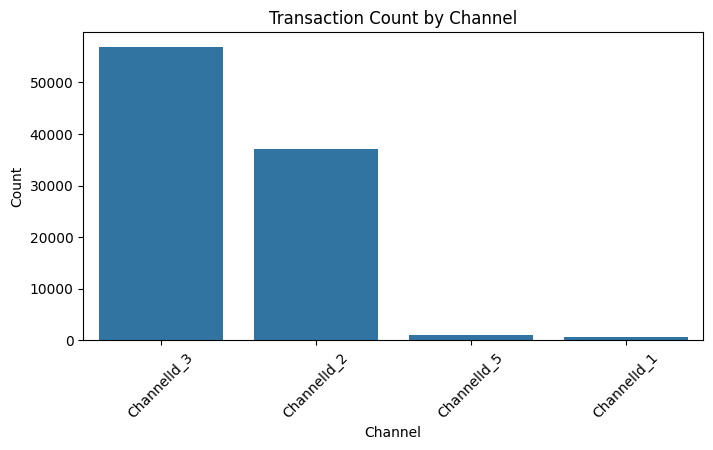

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check value counts
channel_counts = data['ChannelId'].value_counts()

print(channel_counts)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=channel_counts.index, y=channel_counts.values)
plt.title('Transaction Count by Channel')
plt.ylabel('Count')
plt.xlabel('Channel')
plt.xticks(rotation=45)
plt.show()


Check Distribution of ProductCategory

ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64


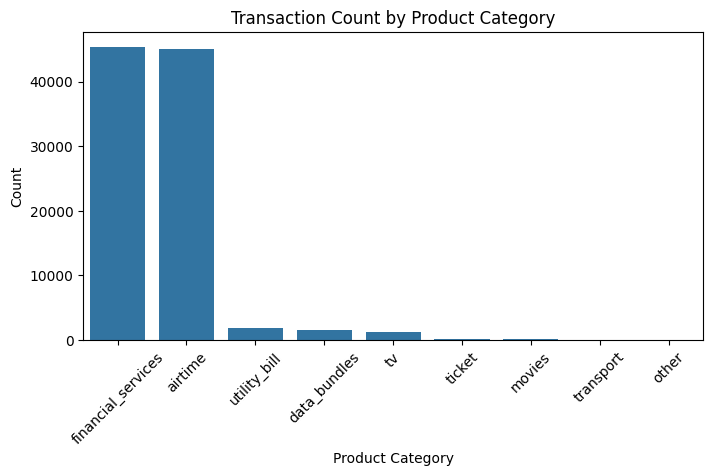

In [15]:
# Check value counts
category_counts = data['ProductCategory'].value_counts()

print(category_counts)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Transaction Count by Product Category')
plt.ylabel('Count')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()


### 🏁 Step 11: Key Insights Template

## Key Insights from EDA

1. Most transactions are completed via channelId_3.
2. Transaction amounts are highly skewed with many extreme outliers.
3. Certain product categories dominate the dataset.
4. [FraudResult] shows a low rate of fraudulent transactions.
5. Minimal/no missing data — dataset is clean for modeling.
